In [ ]:
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [ ]:
# Directories of training and validation images
training_data_dir = '/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/training'
validation_data_dir = '/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/validation'

In [ ]:
# Sets the length and height in pixels of the images
length, height = 150, 150

# number of examples for the neural network at each training step
batch_size = 16

# sets of images for training and validation
training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1. / 255)

# Images for training and validation
training_generator = training_datagen.flow_from_directory(
    training_data_dir,
    target_size=(length, height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(length, height),
    batch_size=batch_size,
    class_mode='categorical')

Found 589 images belonging to 4 classes.
Found 615 images belonging to 4 classes.


## Neural network
* Design the architecture of the neural network

In [32]:
# Creation of Sequential Input Layer
cnn = Sequential()

# Intermediate Convolutional Layer (Apply filtering to images)
conv1_filters = 32
filter1_size = (3, 3)
cnn.add(Convolution2D(conv1_filters, filter1_size, padding ="same", input_shape=(length, height,3), activation='relu'))

# Intermediate Layer - feature extraction
pool_size = (2, 2)
cnn.add(MaxPooling2D(pool_size=pool_size))

# Intermediate Convolutional Layer (Apply filtering to images)
conv2_filters = 64
filter2_size = (2, 2)
cnn.add(Convolution2D(conv2_filters, filter2_size, padding ="same"))

# Intermediate Layer - feature extraction
pool_size = (2, 2)
cnn.add(MaxPooling2D(pool_size=pool_size))

# Intermediate layer (flatten type) for identification
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))

# Add Dense Output Layer for Result
# Number of classes (tomatoes, apples, cucumbers, bananas)
classes = 4
cnn.add(Dense(classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Optimization method
* Select the optimization method, learning rate, and loss function.

In [33]:
learning_rate = 0.0004

cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=learning_rate),
            metrics=['accuracy'])

## Neural network trainig

In [34]:
print('Network in learning process...')
# The fit method trains the neural network, sending it as parameters
# the input data, the results, the epochs and whether or not it is desired
# to show comments during the training process

cycles=20 # Number of learning cycles
batch_size = 16 # Set of examples in a learning step
steps = int(589/batch_size) # Number of steps in a learning cycle

historial=cnn.fit(
    training_generator,
    steps_per_epoch=steps,
    epochs=cycles,
    validation_data=validation_generator,
    validation_steps=steps//2)

print('Neural Network Trained')

# Create directory to save the trained neural network
model_dir = '/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/model'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)
cnn.save('/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/model/model.h5')
cnn.save_weights('/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/model/pesos.weights.h5')

Network in learning process...
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3976 - loss: 3.1019 - val_accuracy: 0.6910 - val_loss: 0.7894
Epoch 2/20
 1/36 ━━━━━━━━━━━━━━━━━━━━ 32s 922ms/step - accuracy: 0.3750 - loss: 1.3463

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.3750 - loss: 1.3463 - val_accuracy: 0.6910 - val_loss: 0.7962
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 852ms/step - accuracy: 0.7135 - loss: 0.6601 - val_accuracy: 0.8205 - val_loss: 0.5220
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.7692 - loss: 0.4716 - val_accuracy: 0.7847 - val_loss: 0.4584
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 939ms/step - accuracy: 0.8079 - loss: 0.4448 - val_accuracy: 0.8021 - val_loss: 0.4165
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6875 - loss: 0.7376 - val_accuracy: 0.7179 - val_loss: 0.5259
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 42s 960ms/step - accuracy: 0.8349 - loss: 0.3959 - val_accuracy: 0.8403 - val_loss: 0.4030
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8750 - loss: 0.4782 - val_accuracy: 0.8333 - val_loss: 0.3927
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.8555 - loss: 0.3598 - val_accuracy: 0.8462 - val_l

Neural Network Trained


### Results of the loss function

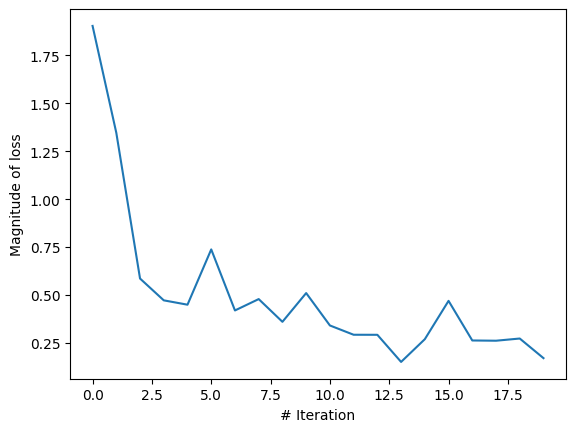

In [35]:
import matplotlib.pyplot as plt
plt.xlabel('# Iteration')
plt.ylabel('Magnitude of loss')
plt.plot(historial.history['loss'])

## Neural network testing

In [36]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import os
import cv2
from time import sleep

In [37]:
# Load model trained neural network
model = '/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/model/model.h5'
model_weights = '/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/model/pesos.weights.h5'
cnn = load_model(model)
cnn.load_weights(model_weights)


### Test 1

In [40]:
# Image to be classified
length, height = 150, 150
file='/content/drive/MyDrive/4. Projects/DL - Fruits Classification/fruits_data/validation/cucumbers/150.jpg'
x=load_img(file, target_size=(length, height))
x=img_to_array(x)
x=np.expand_dims(x, axis=0)

# Image classification using the trained network model
array=cnn.predict(x)
print(array)
result=array[0]
print(result)
answer=np.argmax(result)
print(answer)
if answer==0:print("It's a tomatoe")
if answer==1:print("It's an apple")
if answer==2:print("It's a cucumber")
if answer==3:print("It's a banana")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[0. 0. 1. 0.]]
[0. 0. 1. 0.]
2
It's a cucumber
